<a href="https://colab.research.google.com/github/samnar2017/2023Python-Project1/blob/main/LagData1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataframe
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv' , index_col=0)
# Grouping the dataframe by 'School Name' and excluding the group containing NaN values
df1 = df.groupby('School Name').filter(lambda x: x['School Name'].notna().all())
df1['Percent Scoring 80 or Above'] = pd.to_numeric(df1['Percent Scoring 80 or Above'], errors='coerce')
# Getting unique group names 
group = df1['School Name'].unique()
# Selecting a random group name
random_group = random.choice(group)
# Extracting all rows from the selected group, as this is going to be our initial comparison point 
result = df1[df1['School Name'] == random_group]
#Exrtracting the remaing groups 
result2 = df1[df1['School Name'] != random_group]
# Displaying two date frames side by side 
display(result, result2)

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
30Q301,Academy for Careers in Television and Film,High school,Algebra2/Trigonometry,2015,87,52.3,61,70.1,26,29.9,8,9.2,8,9.2
30Q301,Academy for Careers in Television and Film,High school,Algebra2/Trigonometry,2016,103,48.9,83,80.6,20,19.4,6,5.8,6,5.8
30Q301,Academy for Careers in Television and Film,High school,Algebra2/Trigonometry,2017,21,40.7,21,100,0,0,0,0.0,0,0
30Q301,Academy for Careers in Television and Film,High school,Common Core Algebra,2015,140,69.1,17,12.1,123,87.9,7,5.0,72,51.4
30Q301,Academy for Careers in Television and Film,High school,Common Core Algebra,2016,174,73.8,25,14.4,149,85.6,57,32.8,124,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30Q301,Academy for Careers in Television and Film,High school,U.S. History and Government,2017,7,85.6,0,0,7,100,6,85.7,na,na
30Q301,Academy for Careers in Television and Film,High school,U.S. History and Government,2017,22,85.1,0,0,22,100,16,72.7,na,na
30Q301,Academy for Careers in Television and Film,High school,U.S. History and Government,2017,70,88.4,1,1.4,69,98.6,58,82.9,na,na


,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,NaN,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,NaN,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,NaN,na,na
84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,NaN,na,na
84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,NaN,na,na


In [2]:
#Let's pick a feature - number of rows each school has and number of rows we have in our randomly selected group and the rest of the groups: 
a = result.shape[0]
b = result2.shape[0]
display(a,b)

83

212248

In [3]:
result2

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,,
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,,,,,,,,,
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84X717,Icahn Charter School,K-8,Living Environment,2016,8,,,,,,,,,
84X717,Icahn Charter School,K-8,Living Environment,2016,5,,,,,,,,,
84X717,Icahn Charter School,K-8,Living Environment,2017,6,,,,,,,,,


In [4]:
#We can also be more specific and get the size of each group in groups outside the randomly selected group: 
remaining_grouped = df.loc[~df.index.isin(result.index)].groupby('School Name')
remaining_group_counts = remaining_grouped.size().reset_index(name='Regents Exam')
remaining_group_counts.rename(columns={'index': 'School Name'}, inplace = True)
remaining_group_counts

,School Name,Regents Exam
0,47 The American Sign Language and English Seco...,356
1,A. Philip Randolph Campus High School,459
2,ACORN Community High School,364
3,Abraham Lincoln High School,480
4,Abraham Lincoln Yabc,248
...,...,...
1006,Young Women's Leadership School,378
1007,Young Women's Leadership School of Brooklyn,337
1008,Young Women's Leadership School of the Bronx,142
1009,"Young Women's Leadership School, Astoria",338


In [41]:
#we can also merge these two groups 
included_grouped = df1.loc[df1.index.isin(result.index)].groupby('School Name')
included_group_counts = included_grouped.size().reset_index(name='Regents Exam')
included_group_counts.rename(columns={'index': 'School Name'}, inplace = True)
included_group_counts
concat = pd.concat([included_group_counts,remaining_group_counts])
new_data = concat.reset_index(drop=True)
new_data

,School Name,Regents Exam
0,Academy for Careers in Television and Film,447
1,47 The American Sign Language and English Seco...,356
2,A. Philip Randolph Campus High School,459
3,ACORN Community High School,364
4,Abraham Lincoln High School,480
...,...,...
1007,Young Women's Leadership School,378
1008,Young Women's Leadership School of Brooklyn,337
1009,Young Women's Leadership School of the Bronx,142
1010,"Young Women's Leadership School, Astoria",338


In [12]:
#Let's find which school got the lowest, highest amount of Regent Exams

max_regents_index = new_data['Regents Exam'].idxmax()
min_regents_index = new_data['Regents Exam'].idxmin()
school_name = new_data.at[max_regents_index, 'School Name']
school_name2 = new_data.at[min_regents_index, 'School Name']
print(f"The school with the highest amount of Regents Exam is {school_name} with a highest number of Regents Exams of {remaining_group_counts['Regents Exam'].max()}")
print(f"The school with the smallest amount of Regents Exam is {school_name2} with a lowest number of Regents Exams of {remaining_group_counts['Regents Exam'].min()}")



The school with the highest amount of Regents Exam is New Visions Charter High School for Advanced Math with a highest number of Regents Exams of 1337
The school with the smallest amount of Regents Exam is Academy for New Americans with a lowest number of Regents Exams of 5


In [13]:
#Then we can find the average, the median, the smallest and biggest value in the Count column to see where our randomly selected group is situated 
avg_value = round(remaining_group_counts['Regents Exam'].sum() / remaining_group_counts['Regents Exam'].count(), 2) 
median_value = round(remaining_group_counts['Regents Exam'].median(), 2)
dictionary = {'The average value of Regents Exam': avg_value, 'The median value of Regents Exam': median_value}
for key, value in dictionary.items():
  print(f"{key}: {value}")

The average value of Regents Exam: 209.56
The median value of Regents Exam: 180.0


In [14]:
# Now let's see how many schools are below or above the later values 
above_average = new_data[new_data["Regents Exam"] > avg_value].shape[0]
below_average = new_data[new_data["Regents Exam"] < avg_value].shape[0]
print("Number of school names with Regents Exams taken above average:", above_average)
print("Number of school names with Regents Exams taken below average:", below_average)

Number of school names with Regents Exams taken above average: 486
Number of school names with Regents Exams taken below average: 526


In [43]:
#Now let's see if there if the schools having highest number of Regent Exams taken has performed better in terms of Number Scoring 80 or Above than the schools having fewer number of Regent Exams taken : 
grouped = result2.groupby('School Name')
avg = grouped['Percent Scoring 80 or Above'].mean()
avg = avg.reset_index()
grouped2 = result.groupby('School Name')
avg2 = grouped2['Percent Scoring 80 or Above'].mean()
avg2 = avg2.reset_index()
new_data2 = pd.concat([avg,avg2], axis= 0)
# Now joining new_data and new_data2
new_table = pd.merge(new_data, new_data2, how="left", on = "School Name")
new_table

,School Name,Regents Exam,Percent Scoring 80 or Above
0,Academy for Careers in Television and Film,447,31.798516
1,47 The American Sign Language and English Seco...,356,9.564734
2,A. Philip Randolph Campus High School,459,19.628065
3,ACORN Community High School,364,8.189848
4,Abraham Lincoln High School,480,13.339558
...,...,...,...
1007,Young Women's Leadership School,378,34.315041
1008,Young Women's Leadership School of Brooklyn,337,17.703077
1009,Young Women's Leadership School of the Bronx,142,23.721429
1010,"Young Women's Leadership School, Astoria",338,32.207895


In [45]:
#Let's see is any school group scored 80 or above for all 'Regents Exams' 
new_table_max = new_table.loc[new_table['Percent Scoring 80 or Above'].max()]
new_table_max

School Name                    Bronx High School of Science
Regents Exam                                            361
Percent Scoring 80 or Above                       90.350151
Name: 100, dtype: object

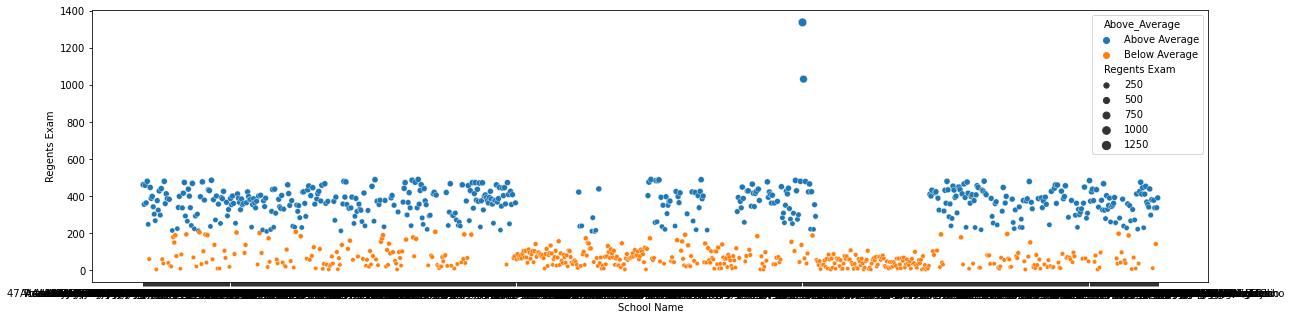

In [19]:
# Let's create a bubble chart with the x-axis split into two sections, one above the average and one below. For that we shall create a new column in the dataframe to indicate whether each value is above or below the average:
new_data['Above_Average'] = new_data['Regents Exam'].apply(lambda x: 'Above Average' if x >= avg_value else 'Below Average')
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x='School Name', y='Regents Exam', size='Regents Exam', hue='Above_Average', data=new_data, ax=ax)
plt.show()
     

In [1]:
!pip install dlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
